In [11]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_lib import *
import time

In [12]:
def plot_b0_b1(mal, F1, F2, x0, x):
    plt.style.use('seaborn')
    plt.figure()
    plt.plot(mal, F1, marker='s', markersize=6, linewidth=4, label='D')
    plt.plot(mal, F2, marker='s', markersize=6, linewidth=4, linestyle='--', label='D\'')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('resources allocated to attacker', fontsize=22)
    plt.ylabel('frequency', fontsize=22)
    plt.legend(loc='best', fontsize=22)
    plt.grid(True)
    plt.savefig('geo1.pdf', bbox_inches="tight")
    plt.show()

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.9


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_90844/1290513094.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


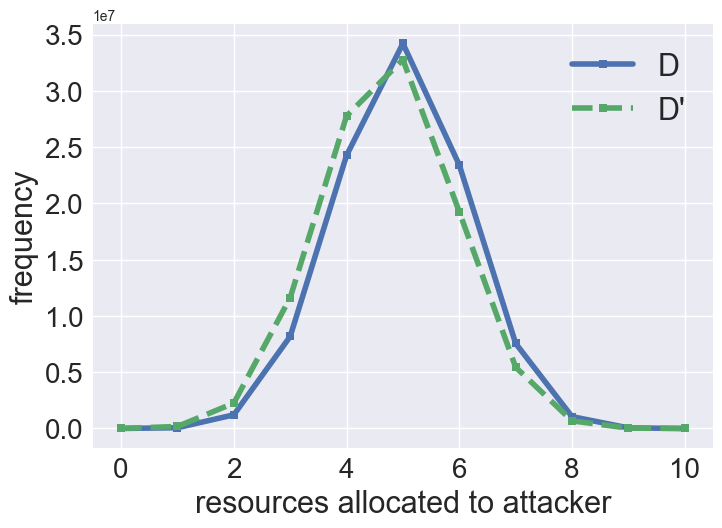

max index before RA (y): 7
geometric - Simulation (k = 10), before RA: 2.3978952727983707
max index (y): 0
geometric - Simulation (k = 10), after RA: 1.4738385957448885
geometric - Simulation (k = 10), before RA (keep inf): inf
geometric - Simulation (k = 10), after RA (keep inf): 1.4738385957448885
utility: 0.49739057600000025
[899, 66586, 1212410, 8176613, 24255682, 34206507, 23413601, 7561870, 1053653, 51642, 537] [3925, 177499, 2254691, 11617630, 27763108, 32776078, 19256489, 5446327, 674422, 29542, 289]
--- 521.459254026413 seconds ---


In [22]:
# Parameter default setup
x = 100
x0 = 10
p = 0
c = 0
lamda = 0
s = 0

# special point test
# noise_type = 'constant'
noise_type = 'geometric'
RD = 100000000  # round of simulation
k = 10
m = 10  # best strategy

P = [0.9]
result = []
utility = []

OFFSET = [10] #bias

start_time = time.time()

for miu in OFFSET:
    for p in P:
        F = []
        F_prime = []
        a = []
        b = []
        uti = []
        for rd in range(RD):
            f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=miu, s=s)
            F.append(f)
            F_prime.append(f_prime)
            ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
            a.append(ra_f)
            b.append(ra_f_p)
            uti.append(u)
            if rd % 10000000 == 0:
                print("\r{0}".format((float(rd) / RD) * 100))

        utility.append(np.mean(uti))
        Before_RA_F, Before_RA_F_p = counter_process(F=F, F_prime=F_prime)
        After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
        print(p)
        plot_b0_b1(range(11), After_RA_F, After_RA_F_p, miu, p)
        r1 = non_inf(np.log(find_max(Before_RA_F, Before_RA_F_p)))
        print('max index before RA (y):', r1.index(max(r1)) - abs(min(0, min(min(F), min(F_prime)))))
        print(str(noise_type) + " - Simulation (k = " + str(k) + "), before RA:", max(r1))
        r2 = non_inf(np.log(find_max(After_RA_F, After_RA_F_p)))
        print('max index (y):', r2.index(max(r2)))
        print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", max(r2))

        print(str(noise_type) + " - Simulation (k = " + str(k) + "), before RA (keep inf):",
              max(np.log(find_max(Before_RA_F, Before_RA_F_p))))
        print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA (keep inf):",
              max(np.log(find_max(After_RA_F, After_RA_F_p))))
        result.append(max(r2))
        print("utility:", np.mean(uti))

print(After_RA_F, After_RA_F_p)
print("--- %s seconds ---" % (time.time() - start_time))
